# Keras 

In [2]:
# Importando librarías
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Regresión lineal y=mx+b+ruido

In [5]:
m = 2
b = 3
x = np.linspace(0,50,100)

# vamos a fijar una semilla en 101, un valor aleatorio para asegurarnos de que obtengas los mismos resultados que yo!
np.random.seed(101) 
ruido = np.random.normal(loc=0.0,scale=4.0,size=len(x))
#loc- media, scale- desviación estandar, size-cantidad

In [6]:
y = m*x + b + ruido

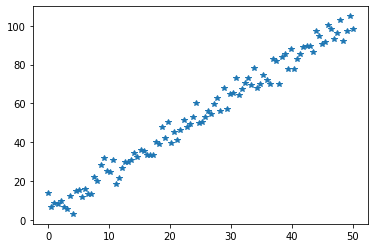

In [7]:
plt.plot(x,y,'*');

## Creando una Red Neuronal para una Regresión

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
# 4 Neuronas, esperamos solo 1 input 
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neuronas
model.add(Dense(4, activation='relu'))
# Solo 1 neurona porque solo tenemos 1 output que es Y
model.add(Dense(1, activation='linear'))
# Compilamos todas las capas
model.compile(loss='mse', optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento de la red

** NOTA: EN ESTE EJEMPLO VAMOS A SALTARNOS EL PASO DE DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA!!!! **

In [11]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 2ms/step - loss: 3316.4602
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 3161.0430
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 3286.4709
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 3294.2333
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 3401.8859
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 3105.9936
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 3217.0541
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 3127.7927
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 3068.9499
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 3158.0920
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 3125.4150
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 3144.1024
Epoch 13/200
4/4 [=======

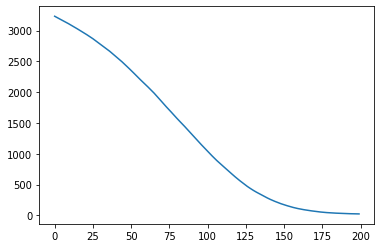

In [12]:
loss=model.history.history['loss']
epochs=range(len(loss))
plt.plot(epochs,loss)

## Prediciendo nuevos puntos con el modelo creado


In [13]:
x_for_predictions = np.linspace(0,50,1000)

In [14]:
y_predicted = model.predict(x_for_predictions)

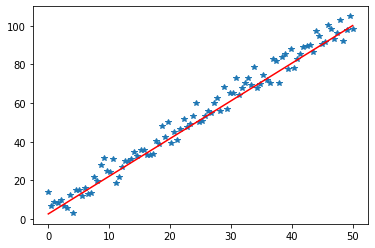

In [15]:
# X e Y originales
plt.plot(x,y,'*')
# Línea de predicción
plt.plot(x_for_predictions,y_predicted,'r');

# Evaluando el error

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
# Predicciones
prediction_for_true_y = model.predict(x)

In [20]:
mean_squared_error(y,prediction_for_true_y)

22.21224019321466

In [21]:
mean_absolute_error(y,prediction_for_true_y)

3.7713341129911693